In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_AMZN = pd.read_csv('/content/sentiments_amzn_year.csv')

In [ ]:
data_AMZN.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Negative,Neutral,Count
0,0,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,60.000000,20.000000,20.000000,5
1,1,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN,50.000000,12.500000,37.500000,8
2,2,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN,41.666667,8.333333,50.000000,12
3,3,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN,50.000000,33.333333,16.666667,6
4,4,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN,42.857143,14.285714,42.857143,7


In [ ]:
data_AMZN['Date'] = pd.to_datetime(data_AMZN['Date'])
dates = data_AMZN['Date']
dates

0     2021-09-30
1     2021-10-01
2     2021-10-04
3     2021-10-05
4     2021-10-06
         ...    
247   2022-09-23
248   2022-09-26
249   2022-09-27
250   2022-09-28
251   2022-09-29
Name: Date, Length: 252, dtype: datetime64[ns]

In [ ]:
data_AMZN = data_AMZN.drop(['Date'],axis=1)

In [ ]:
data_amzn = data_AMZN.iloc[:,2:12]
data_amzn.head()

,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Negative,Neutral,Count
0,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,60.000000,20.000000,20.000000,5
1,165.458496,162.796997,164.162994,164.162994,56712000,AMZN,50.000000,12.500000,37.500000,8
2,163.999496,158.812500,159.488998,159.488998,90462000,AMZN,41.666667,8.333333,50.000000,12
3,163.036499,160.123001,161.050003,161.050003,65384000,AMZN,50.000000,33.333333,16.666667,6
4,163.216995,159.931000,163.100494,163.100494,50660000,AMZN,42.857143,14.285714,42.857143,7


In [ ]:
closing_prices = data_amzn['Close']
closing_prices = closing_prices.to_numpy()
closing_prices

array([164.2519989 , 164.16299438, 159.48899841, 161.05000305,
       163.10049438, 165.12150574, 164.43099976, 162.31500244,
       162.36650085, 164.21400452, 164.99299622, 170.45100403,
       172.33700562, 172.20750427, 170.75300598, 171.75050354,
       166.77749634, 166.01849365, 168.80349731, 169.62449646,
       172.32850647, 168.62150574, 165.90550232, 165.63749695,
       169.19999695, 173.8500061 , 175.94949341, 174.44900513,
       178.81149292, 174.10249329, 173.625     , 176.25750732,
       177.28399658, 177.03500366, 177.44999695, 184.80299377,
       183.82850647, 178.62849426, 179.0019989 , 179.02049255,
       175.22799683, 178.07850647, 175.35350037, 172.18600464,
       171.86799622, 169.48950195, 171.36849976, 176.164505  ,
       176.15800476, 174.17100525, 172.21200562, 169.56750488,
       169.09150696, 173.31500244, 168.8710022 , 170.01750183,
       167.07899475, 170.41700745, 171.03700256, 171.0684967 ,
       169.66949463, 170.66099548, 169.20100403, 168.64

In [ ]:
score = []
for i in range(0,len(data_amzn)):
  a = data_amzn['Positive'][i] - data_amzn['Negative'][i]
  score.append(a)

df = pd.concat([data_amzn,score],axis = 1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [ ]:
score


AttributeError: module 'numpy' has no attribute 'to_array'

<BarContainer object of 252 artists>

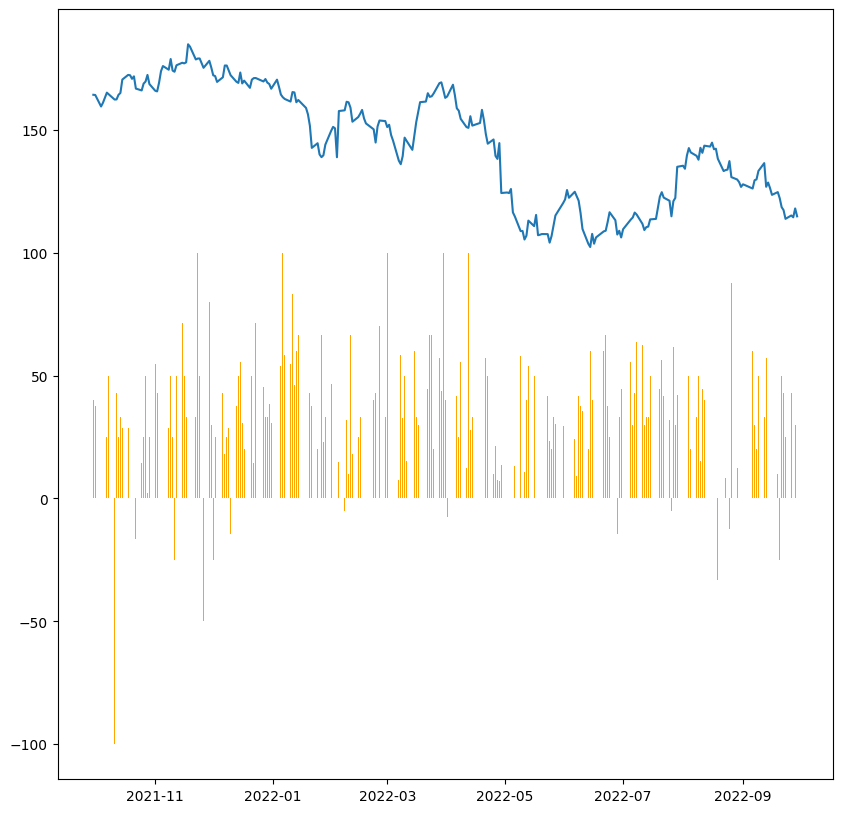

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(dates,closing_prices)
plt.bar(dates,score,width = 0.4,color = 'orange')

In [ ]:
from sklearn.preprocessing import StandardScaler
stock_price_features = ['Low', 'High', 'Close','Positive','Negative','Neutral']
scaler = StandardScaler()
data_amzn[stock_price_features] = scaler.fit_transform(data_amzn[stock_price_features])
data_amzn.head()

,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Negative,Neutral,Count
0,0.848044,0.918942,0.854807,164.251999,56848000,AMZN,0.521472,0.199424,-0.712831,5
1,0.807365,0.880062,0.850941,164.162994,56712000,AMZN,-0.062641,-0.359080,0.362041,8
2,0.743822,0.708406,0.647923,159.488998,90462000,AMZN,-0.549402,-0.669360,1.129807,12
3,0.701881,0.764864,0.715726,161.050003,65384000,AMZN,-0.062641,1.192320,-0.917568,6
4,0.709742,0.756592,0.804791,163.100494,50660000,AMZN,-0.479864,-0.226103,0.691084,7


In [ ]:
Y = []


Y = data_amzn['Close']
Y = Y.to_numpy()
Y = Y[6:]
Y


array([164.43099976, 162.31500244, 162.36650085, 164.21400452,
       164.99299622, 170.45100403, 172.33700562, 172.20750427,
       170.75300598, 171.75050354, 166.77749634, 166.01849365,
       168.80349731, 169.62449646, 172.32850647, 168.62150574,
       165.90550232, 165.63749695, 169.19999695, 173.8500061 ,
       175.94949341, 174.44900513, 178.81149292, 174.10249329,
       173.625     , 176.25750732, 177.28399658, 177.03500366,
       177.44999695, 184.80299377, 183.82850647, 178.62849426,
       179.0019989 , 179.02049255, 175.22799683, 178.07850647,
       175.35350037, 172.18600464, 171.86799622, 169.48950195,
       171.36849976, 176.164505  , 176.15800476, 174.17100525,
       172.21200562, 169.56750488, 169.09150696, 173.31500244,
       168.8710022 , 170.01750183, 167.07899475, 170.41700745,
       171.03700256, 171.0684967 , 169.66949463, 170.66099548,
       169.20100403, 168.64450073, 166.71699524, 170.40449524,
       167.52200317, 164.35699463, 163.2539978 , 162.55

In [ ]:
X = data_amzn.drop(['Stock Name','Count','Volume'],axis = 1)
X.head()

,High,Low,Close,Adj Close,Positive,Negative,Neutral
0,166.392502,163.699493,164.251999,164.251999,60.000000,20.000000,20.000000
1,165.458496,162.796997,164.162994,164.162994,50.000000,12.500000,37.500000
2,163.999496,158.812500,159.488998,159.488998,41.666667,8.333333,50.000000
3,163.036499,160.123001,161.050003,161.050003,50.000000,33.333333,16.666667
4,163.216995,159.931000,163.100494,163.100494,42.857143,14.285714,42.857143


In [ ]:
import numpy as np

# Assuming df is your DataFrame with 8 columns and multiple rows
# Convert the DataFrame to a numpy array
data = X.to_numpy()

# Define the shape of the 3D array
num_rows = data.shape[0] - 6  # Number of 2D arrays
num_arrays_per_2d = 7  # Number of 1D arrays per 2D array
num_cols = data.shape[1]  # Number of columns in the DataFrame
shape_3d = (num_rows, num_arrays_per_2d, num_cols)

# Initialize the 3D array
array_3d = np.zeros(shape_3d)

# Construct the 3D array
for i in range(num_rows):
    # Extract the rows for the current 2D array
    rows = data[i:i+num_arrays_per_2d, :]
    # Assign the rows to the corresponding 2D array
    array_3d[i, :, :] = rows

array_3d

array([[[166.39250183, 163.69949341, 164.2519989 , ...,  60.        ,
          20.        ,  20.        ],
        [165.45849609, 162.79699707, 164.16299438, ...,  50.        ,
          12.5       ,  37.5       ],
        [163.99949646, 158.8125    , 159.48899841, ...,  41.66666667,
           8.33333333,  50.        ],
        ...,
        [163.21699524, 159.93099976, 163.10049438, ...,  42.85714286,
          14.28571429,  42.85714286],
        [166.2875061 , 164.15299988, 165.12150574, ...,  50.        ,
          25.        ,  25.        ],
        [166.07150269, 164.41000366, 164.43099976, ...,  50.        ,
           0.        ,  50.        ]],

       [[165.45849609, 162.79699707, 164.16299438, ...,  50.        ,
          12.5       ,  37.5       ],
        [163.99949646, 158.8125    , 159.48899841, ...,  41.66666667,
           8.33333333,  50.        ],
        [163.03649902, 160.1230011 , 161.05000305, ...,  50.        ,
          33.33333333,  16.66666667],
        ...,


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = array_3d



print(len(X))
print(len(Y))

246
246


In [ ]:
l = [0.001]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers



def longShortTerm(l,X,Y):
    split_index = int(len(X) * 0.8)  # 95-5 split
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = Y[:split_index], Y[split_index:]

    print(X_train.shape)

    # Reshape X_train and X_test to include the time dimension


    # Step 2: Define the LSTM Model
    model = Sequential([layers.Input((X_train.shape[1], X_train.shape[2])),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])

    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=l),
                  metrics=['mean_absolute_error'])

    # Step 3: Compile the Model


    # Step 4: Train the Model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

    # Step 5: Evaluate the Model (if needed)
    # loss = model.evaluate(X_test, y_test)

    # Step 6: Make Predictions
    predictions = model.predict(X_test)

    # Print the predicted closing prices for the next 7 days
    return predictions


In [ ]:
pred = []
for i in l:
  pred.append(longShortTerm(i,X,Y))


(196, 7, 7)
Epoch 1/100
7/7 [==============================] - 4s 131ms/step - loss: 22101.8242 - mean_absolute_error: 146.7139 - val_loss: 16481.4082 - val_mean_absolute_error: 128.0636
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 21728.0352 - mean_absolute_error: 145.4044 - val_loss: 16147.6338 - val_mean_absolute_error: 126.7526
Epoch 3/100
7/7 [==============================] - 0s 67ms/step - loss: 21351.2480 - mean_absolute_error: 144.0996 - val_loss: 15813.5303 - val_mean_absolute_error: 125.4271
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 20962.2598 - mean_absolute_error: 142.7450 - val_loss: 15450.7988 - val_mean_absolute_error: 123.9715
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 20504.6797 - mean_absolute_error: 141.1274 - val_loss: 14923.9404 - val_mean_absolute_error: 121.8287
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 19842.3223 - mean_absolute_error: 138.7659 - 

In [ ]:
split_index = int(len(X) * 0.8)  # 95-5 split
y_train, y_test = Y[:split_index], Y[split_index:]

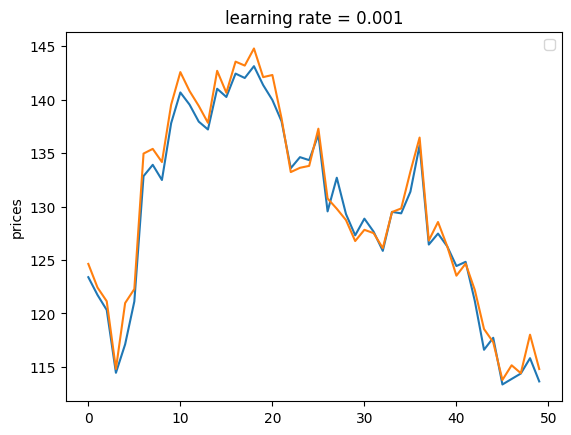

In [ ]:
import matplotlib.pyplot as plt
c = 1

for i in range(0,len(pred)):
    plt.subplot(1,1,c)
    plt.plot(pred[i])
    plt.plot(y_test)
    plt.title(f'learning rate = {l[i]}')
    plt.ylabel('prices')
    plt.legend()
    plt.show()
    c = c+1

In [ ]:
X_normal = data_amzn.drop(['Stock Name','Count','Volume','Positive','Negative','Neutral'],axis = 1)
X_normal.head()

,High,Low,Close,Adj Close
0,166.392502,163.699493,164.251999,164.251999
1,165.458496,162.796997,164.162994,164.162994
2,163.999496,158.812500,159.488998,159.488998
3,163.036499,160.123001,161.050003,161.050003
4,163.216995,159.931000,163.100494,163.100494


In [ ]:
import numpy as np

# Assuming df is your DataFrame with 8 columns and multiple rows
# Convert the DataFrame to a numpy array
data_normal = X_normal.to_numpy()

# Define the shape of the 3D array
num_rows = data_normal.shape[0] - 6  # Number of 2D arrays
num_arrays_per_2d = 7  # Number of 1D arrays per 2D array
num_cols = data_normal.shape[1]  # Number of columns in the DataFrame
shape_3d = (num_rows, num_arrays_per_2d, num_cols)

# Initialize the 3D array
array_3d_normal = np.zeros(shape_3d)

# Construct the 3D array
for i in range(num_rows):
    # Extract the rows for the current 2D array
    rows = data_normal[i:i+num_arrays_per_2d, :]
    # Assign the rows to the corresponding 2D array
    array_3d_normal[i, :, :] = rows

array_3d_normal

array([[[166.39250183, 163.69949341, 164.2519989 , 164.2519989 ],
        [165.45849609, 162.79699707, 164.16299438, 164.16299438],
        [163.99949646, 158.8125    , 159.48899841, 159.48899841],
        ...,
        [163.21699524, 159.93099976, 163.10049438, 163.10049438],
        [166.2875061 , 164.15299988, 165.12150574, 165.12150574],
        [166.07150269, 164.41000366, 164.43099976, 164.43099976]],

       [[165.45849609, 162.79699707, 164.16299438, 164.16299438],
        [163.99949646, 158.8125    , 159.48899841, 159.48899841],
        [163.03649902, 160.1230011 , 161.05000305, 161.05000305],
        ...,
        [166.2875061 , 164.15299988, 165.12150574, 165.12150574],
        [166.07150269, 164.41000366, 164.43099976, 164.43099976],
        [164.62950134, 161.90499878, 162.31500244, 162.31500244]],

       [[163.99949646, 158.8125    , 159.48899841, 159.48899841],
        [163.03649902, 160.1230011 , 161.05000305, 161.05000305],
        [163.21699524, 159.93099976, 163.10049

In [ ]:
X_normal = array_3d_normal


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

split_index = int(len(X) * 0.7)  # 95-5 split
X_train, X_test = X_normal[:split_index], X_normal[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

print(X_train.shape)

# Reshape X_train and X_test to include the time dimension


# Step 2: Define the LSTM Model
model = Sequential([layers.Input((X_train.shape[1], X_train.shape[2])),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Step 3: Compile the Model


# Step 4: Train the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Step 5: Evaluate the Model (if needed)
# loss = model.evaluate(X_test, y_test)

# Step 6: Make Predictions
predictions = model.predict(X_test)

# Print the predicted closing prices for the next 7 days
print("Predicted closing prices for the next 7 days:")
print(predictions[-1])


(172, 7, 4)
Epoch 1/100
6/6 [==============================] - 4s 127ms/step - loss: 23763.8320 - mean_absolute_error: 152.6614 - val_loss: 15368.5352 - val_mean_absolute_error: 123.4263
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 23546.6562 - mean_absolute_error: 151.9506 - val_loss: 15199.5605 - val_mean_absolute_error: 122.7401
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 23342.3047 - mean_absolute_error: 151.2771 - val_loss: 15039.1367 - val_mean_absolute_error: 122.0851
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 23141.0137 - mean_absolute_error: 150.6055 - val_loss: 14855.2920 - val_mean_absolute_error: 121.3301
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 22907.2422 - mean_absolute_error: 149.8349 - val_loss: 14661.5674 - val_mean_absolute_error: 120.5277
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 22644.1992 - mean_absolute_error: 148.9466 - 

In [ ]:
len(y_test)

13

In [ ]:
y_test

array([-0.74854809, -0.67371934, -0.77190504, -0.89085225, -0.84197555,
       -0.94881182, -1.10668727, -1.15988926, -1.31257417, -1.25331672,
       -1.28532424, -1.12961159, -1.26845539])

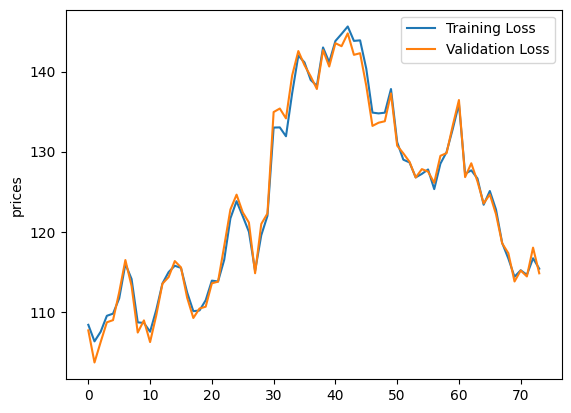

In [ ]:
import matplotlib.pyplot as plt


plt.plot(predictions, label='Training Loss')
plt.plot(y_test, label='Validation Loss')
plt.ylabel('prices')
plt.legend()
plt.show()

In [ ]:

split_index = int(len(X) * 0.8)  # 80-20 split
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

print(X_test.head())
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(y_pred)
print(mse)


         low      high    volume   Positve  Negative   Neutral     Total  \
87 -0.139932 -0.160359  0.256214 -0.125232  0.905104 -0.259517 -0.555478   
88 -1.187560 -0.533388  0.407889  0.106664  0.481959 -0.292787 -0.688269   
89 -1.750253 -0.981706  0.741214  0.144313  0.305544 -0.254011 -0.792311   
90 -0.680059 -0.663434  0.138957  0.179986 -0.721975  0.135582 -0.149576   
91 -0.799684 -0.872364 -0.091423  1.270917 -0.646278 -0.868378  0.170764   

    NeutralPos  
87   -0.717299  
88   -0.380284  
89   -0.325569  
90   -0.273726  
91    1.311724  
[-0.11268191 -0.95170603 -1.4435422  -0.72767582 -0.84599673 -0.50086664
  0.15922897  0.31094986 -0.07843457  0.05079143 -0.14019434  0.04095506
  0.3622306   0.5651864   0.38468795 -0.03350948 -0.33829908 -0.01135505
  0.12696159  0.20436346  0.28913453  0.53991856]
0.05948340811034874


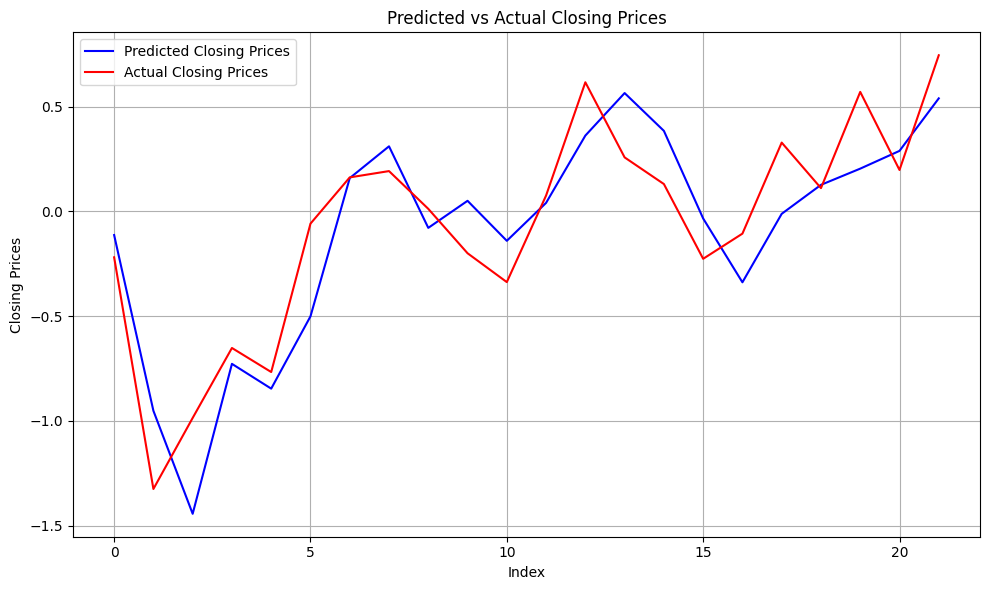

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_pred and y_test as numpy arrays or lists
# Plotting y_pred and y_test on the same graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_pred)), y_pred, color='blue', label='Predicted Closing Prices')
plt.plot(np.arange(len(y_test)), y_test, color='red', label='Actual Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Prices')
plt.title('Predicted vs Actual Closing Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
x = X.iloc[:,:3]
x.head()

,low,high,volume
0,-1.602624,-1.610550,-0.635103
1,-1.397811,-1.553244,-0.826809
2,-1.439499,-1.584027,-0.843999
3,-1.372436,-1.495048,-0.754891
4,-1.401436,-1.613116,-0.837472


In [ ]:
split_index = int(len(x) * 0.8)  # 80-20 split
X_train, X_test = x[:split_index], x[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

print(X_test.head())
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(y_pred)
print(mse)



         low      high    volume
87 -0.139932 -0.160359  0.256214
88 -1.187560 -0.533388  0.407889
89 -1.750253 -0.981706  0.741214
90 -0.680059 -0.663434  0.138957
91 -0.799684 -0.872364 -0.091423
[-1.52138406e-01 -9.14679236e-01 -1.41968488e+00 -6.75576819e-01
 -8.35383873e-01 -5.28187700e-01 -5.13300236e-03  2.63303569e-01
 -5.71407425e-02 -9.12888206e-04 -2.37340101e-01 -4.95244214e-02
  3.15921733e-01  4.90547412e-01  2.96412565e-01 -1.02793812e-01
 -3.58029955e-01  3.28589433e-02  2.09692688e-01  2.35732438e-01
  3.32196896e-01  5.62180837e-01]
0.05465059713536269


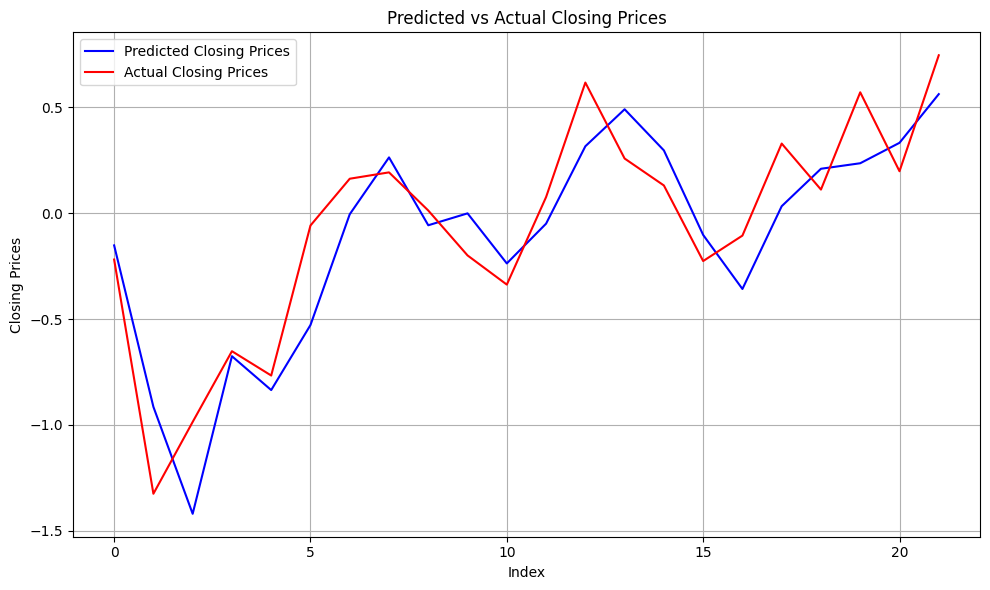

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_pred and y_test as numpy arrays or lists
# Plotting y_pred and y_test on the same graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_pred)), y_pred, color='blue', label='Predicted Closing Prices')
plt.plot(np.arange(len(y_test)), y_test, color='red', label='Actual Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Prices')
plt.title('Predicted vs Actual Closing Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()